In [1]:
ls


 Volume in drive C is Windows 
 Volume Serial Number is 04F5-FC96

 Directory of C:\Users\Yamlak\Documents\IU PhD Journey\ML for BioInformatics\Multifactor Analysis of Prostate Cancer

26/03/2025  18:12    <DIR>          .
24/04/2025  07:55    <DIR>          ..
22/03/2025  11:13                44 .gitignore
22/03/2025  10:27    <DIR>          .ipynb_checkpoints
26/03/2025  18:12         1,364,750 Analysis.ipynb
22/03/2025  10:21       127,450,102 data_curated_trans.csv
               3 File(s)    128,814,896 bytes
               3 Dir(s)   8,667,721,728 bytes free


In [92]:
pip install xgboost


     ------------------------------------- 124.9/124.9 MB 11.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv('data_curated_trans.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 45606 entries, PATIENT_ID to hsa-mir-224
dtypes: float64(45605), object(1)
memory usage: 170.1+ MB


In [19]:
print("Dataset Shape:", data.shape)  # (rows, columns)
print("\nFirst 5 rows of the dataset:")
print(data.head())

num_columns = data.shape[1]
print(f"\nTotal number of columns: {num_columns}")

Dataset Shape: (489, 45606)

First 5 rows of the dataset:
     PATIENT_ID  PATH_N_STAGE  NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT  \
0  TCGA-2A-A8VL           2.0                                      2.0   
1  TCGA-2A-A8VO           3.0                                      2.0   
2  TCGA-2A-A8VT           1.0                                      2.0   
3  TCGA-2A-A8VV           2.0                                      2.0   
4  TCGA-2A-A8VX           2.0                                      2.0   

   PATH_T_STAGE  PRIOR_DX  RADIATION_THERAPY   AGE  M_UBE2Q2P2  M_HMGB1P1  \
0           1.0       2.0                2.0  51.0     -0.0361        NaN   
1           2.0       2.0                2.0  57.0     -0.3004        NaN   
2           2.0       2.0                1.0  47.0      3.1758        NaN   
3           1.0       2.0                2.0  52.0     -0.1102        NaN   
4           2.0       2.0                2.0  70.0     -0.7052        NaN   

   M_LOC155060  ...  hsa-mir-1321 

In [20]:
missing_values = data.isnull().sum()
missing_values 

PATIENT_ID                                 0
PATH_N_STAGE                               0
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT    0
PATH_T_STAGE                               0
PRIOR_DX                                   0
                                          ..
hsa-mir-513c                               0
hsa-mir-513b                               0
hsa-mir-513a-1                             0
hsa-mir-513a-2                             0
hsa-mir-224                                0
Length: 45606, dtype: int64

In [21]:
missing_values.sum()

281754

In [22]:
# Filter columns that have missing values
columns_with_missing = missing_values[missing_values > 0]

# Display missing values
print("\nColumns with missing values and their count:")
print(columns_with_missing)



Columns with missing values and their count:
M_HMGB1P1     489
M_RNU12-2P    489
M_SSX9         33
M_CXORF67     489
M_EFCAB8      489
             ... 
M_ZNF679       33
M_ZNF735       33
M_ZNF99        33
M_ZP4          33
M_ZSWIM2       33
Length: 1546, dtype: int64


In [23]:
data_cleaned = data.dropna(axis=1)

In [24]:
data.shape, data_cleaned.shape

((489, 45606), (489, 44060))

In [25]:
data_cleaned.isnull().sum().sum()

0

In [26]:
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns

num_features = len(numerical_cols)
features_per_plot = 20
num_plots = int(np.ceil(num_features / features_per_plot))

# Generate box plots in batches of 20 features
# for i in range(num_plots):
#     plt.figure(figsize=(15, 6))
    

#     subset_cols = numerical_cols[i * features_per_plot : (i + 1) * features_per_plot]
    

#     data_cleaned[subset_cols].boxplot()
#     plt.xticks(rotation=90)
#     plt.title(f"Boxplot for Features {i * features_per_plot + 1} to {(i + 1) * features_per_plot}")
#     plt.show()

In [27]:
data_cleaned.columns 

Index(['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
       'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE', 'M_UBE2Q2P2',
       'M_LOC155060', 'M_GTPBP6',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=44060)

In [28]:
exclude_columns = ['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 
                   'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']

# Exclude the specified columns
data_filtered = data_cleaned.drop(columns=exclude_columns)

In [29]:
exclude_columns = ['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 
                   'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']

# Remove the excluded columns before computing the standard deviation
data_filtered_for_sd = data_cleaned.drop(columns=exclude_columns)

# Calculate the standard deviation for the remaining columns
std_dev = data_filtered_for_sd.std()

# Set a threshold to filter out high-variability columns (optional: you can adjust the threshold)
threshold = std_dev.mean() + 1 * std_dev.std()  # Keep columns with SD below (mean + 1*SD)

# Get the filtered columns based on the threshold
filtered_columns = std_dev[std_dev < threshold].index

# Create a new dataset with only the selected columns (filtered columns + excluded columns)
data_filtered = data_cleaned[exclude_columns + filtered_columns.tolist() ]

# Display the number of features before and after filtering
print(f"Original number of features: {data_cleaned.shape[1]}")
print(f"Number of features after filtering: {data_filtered.shape[1]}")


# Show the filtered columns
print("\nColumns with smaller variability (excluding excluded ones):")
print(filtered_columns)

Original number of features: 44060
Number of features after filtering: 43964

Columns with smaller variability (excluding excluded ones):
Index(['M_UBE2Q2P2', 'M_LOC155060', 'M_GTPBP6', 'M_EFCAB12', 'M_A1BG',
       'M_A1CF', 'M_RBFOX1', 'M_GGACT', 'M_A2M', 'M_A2ML1',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43957)


In [30]:
data_filtered[filtered_columns]

,M_UBE2Q2P2,M_LOC155060,M_GTPBP6,M_EFCAB12,M_A1BG,M_A1CF,M_RBFOX1,M_GGACT,M_A2M,M_A2ML1,...,hsa-mir-1321,hsa-mir-361,hsa-mir-548m,hsa-mir-652,hsa-mir-220a,hsa-mir-513c,hsa-mir-513b,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-224
0,-0.0361,0.3014,-0.2867,0.9115,0.2252,-0.1838,0.3830,-0.5284,-0.7255,0.1866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.3004,0.6841,0.6619,1.7160,-0.6237,-0.1838,0.1567,-0.0413,0.4708,-0.4744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.1758,2.8191,0.2520,-0.6433,-0.6380,-0.1633,-0.3436,-0.1908,-0.7193,-0.4985,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.1102,-0.1719,-0.2612,0.2185,-0.6294,-0.1838,-0.2837,0.0488,-0.4417,-0.5010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7052,0.3580,0.9095,-0.1748,-0.1893,-0.1838,-0.3850,1.3400,-0.4493,-0.4765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.6768,10.6747,-0.9893,0.0690,-0.3671,-0.1838,-0.3078,-1.8237,-0.4308,0.4972,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0
485,-0.2252,-0.0288,-0.1738,-1.3305,0.1966,-0.1838,0.0035,-0.6731,0.7859,0.5392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,-0.8350,-0.5767,0.5719,-1.2691,-0.6668,-0.1838,-0.4006,-0.5881,0.0745,-0.2450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,0.4274,-0.0456,0.0093,-0.0881,-0.3998,-0.1838,-0.4006,2.6657,-0.7081,-0.0225,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the selected filtered columns
data_filtered[filtered_columns] = scaler.fit_transform(data_filtered[filtered_columns])

# Display the first few rows of the normalized data
print(data_filtered[filtered_columns].head())


<ipython-input-31-fe714ff2cc52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[filtered_columns] = scaler.fit_transform(data_filtered[filtered_columns])


   M_UBE2Q2P2  M_LOC155060  M_GTPBP6  M_EFCAB12    M_A1BG    M_A1CF  M_RBFOX1  \
0   -0.034865     0.170136 -0.295397   0.956829  0.208765 -0.206023  0.388494   
1   -0.299827     0.499787  0.664889   1.773452 -0.622515 -0.206023  0.157573   
2    3.185082     2.338838  0.249939  -0.621400 -0.636518 -0.185429 -0.352941   
3   -0.109151    -0.237556 -0.269583   0.253386 -0.628096 -0.206023 -0.291818   
4   -0.705642     0.218890  0.915539  -0.145840 -0.197131 -0.206023 -0.395186   

    M_GGACT     M_A2M   M_A2ML1  ...  hsa-mir-1321  hsa-mir-361  hsa-mir-548m  \
0 -0.371170 -0.740960  0.118071  ...      0.160296     0.162313      0.116641   
1  0.098936  0.514498 -0.390310  ...      0.160296     0.162313      0.116641   
2 -0.045348 -0.734453 -0.408846  ...     -2.639159    -2.574618     -2.885337   
3  0.185892 -0.443126 -0.410769  ...      0.160296     0.162313      0.116641   
4  1.432044 -0.451102 -0.391925  ...      0.160296     0.162313      0.116641   

   hsa-mir-652  hsa-mir-22

In [32]:
filtered_columns

Index(['M_UBE2Q2P2', 'M_LOC155060', 'M_GTPBP6', 'M_EFCAB12', 'M_A1BG',
       'M_A1CF', 'M_RBFOX1', 'M_GGACT', 'M_A2M', 'M_A2ML1',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43957)

In [33]:
data_filtered.columns

Index(['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
       'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE', 'M_UBE2Q2P2',
       'M_LOC155060', 'M_GTPBP6',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43964)

# Progression

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = data_filtered.drop(columns= ['PATIENT_ID', 'PATH_N_STAGE'])  # All features
y = data_filtered['PATH_N_STAGE']  # Replace with the appropriate target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LassoCV
lasso = LassoCV(cv=5)  # Lasso with cross-validation
lasso.fit(X_train, y_train)

# Get the features selected by Lasso (non-zero coefficients)
selected_features = X.columns[(lasso.coef_ != 0)]

print(f"Selected features by Lasso: {selected_features}")


Selected features by Lasso: Index(['AGE', 'M_AJAP1', 'M_ALPI', 'M_BARX1', 'M_BTBD18', 'M_TMEM52B',
       'M_DHRS4-AS1', 'M_PRR35', 'M_SPATA46', 'M_C1ORF115', 'M_SPANXC.4',
       'M_C20ORF203', 'M_C9ORF163', 'M_CARS', 'M_CC2D2A', 'M_CCL8', 'M_CHRNA6',
       'M_CSTL1', 'M_DDX5', 'M_DNAH8', 'M_FAF2', 'M_FAM19A1', 'M_FAM25A',
       'M_FAM76A', 'M_FAR1', 'M_FLI1', 'M_FMOD', 'M_FSCB', 'M_GAL3ST3',
       'M_HERC5', 'M_HIST1H3A', 'M_HIST1H3J', 'M_ARHGAP45', 'M_IL1R1',
       'M_KCNJ13', 'M_KLC3', 'M_ASH1L-AS1', 'M_LSM11', 'M_MAP2K6', 'M_MMD2',
       'M_NRP1', 'M_OMP', 'M_OR1J1', 'M_PCSK7', 'M_HELZ2', 'M_RNF213',
       'M_SAMD9', 'M_SPOP', 'M_SRI', 'M_UNC93A', 'M_ZNF22', 'SCARNA3',
       'HNRNPLL', 'EGFEM1P', 'LOC101927069', 'PRKACG', 'FXN', 'KLF4',
       'SLC22A24', 'SLC22A25', 'MIR3680-1', 'MIR4300', 'B4GALNT3', 'AWAT2',
       'MIR676'],
      dtype='object')


In [36]:
selected_features_for_progression = selected_features

In [37]:
len(selected_features_for_progression), 


(65,)

# Therapy Response

In [38]:

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = data_filtered.drop(columns= ['PATIENT_ID', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT'])  # All features
y = data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LassoCV
lasso = LassoCV(cv=5)  # Lasso with cross-validation
lasso.fit(X_train, y_train)

# Get the features selected by Lasso (non-zero coefficients)
selected_features = X.columns[(lasso.coef_ != 0)]

print(f"Selected features by Lasso: {selected_features}")



Selected features by Lasso: Index(['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9',
       'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2',
       'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C',
       'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13',
       'MIR662', 'PPM1F', 'LIF', 'SF3A1'],
      dtype='object')


In [109]:
selected_features_for_response = selected_features.tolist()

print(selected_features_for_response)

# Use extend() to add multiple items individually
selected_features_for_response.extend(['PATH_N_STAGE', 'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE'])

print(selected_features_for_response)

['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9', 'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2', 'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C', 'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13', 'MIR662', 'PPM1F', 'LIF', 'SF3A1']
['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9', 'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2', 'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C', 'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13', 'MIR662', 'PPM1F', 'LIF', 'SF3A1', 'PATH_N_STAGE', 'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']


In [110]:
len(selected_features_for_response)

33

# Visualizations of selected features

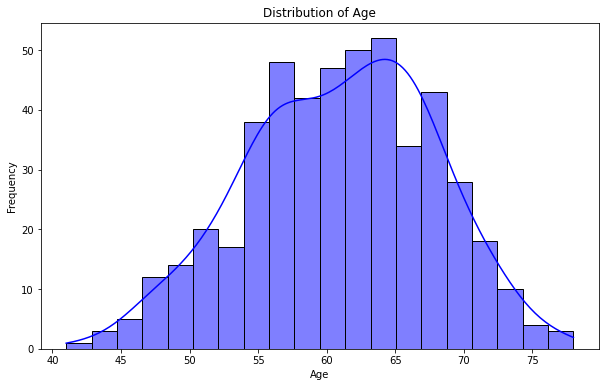

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['AGE'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


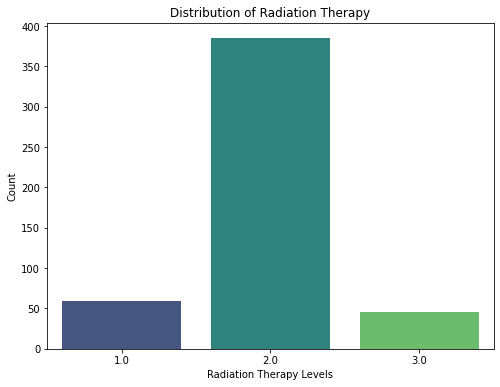

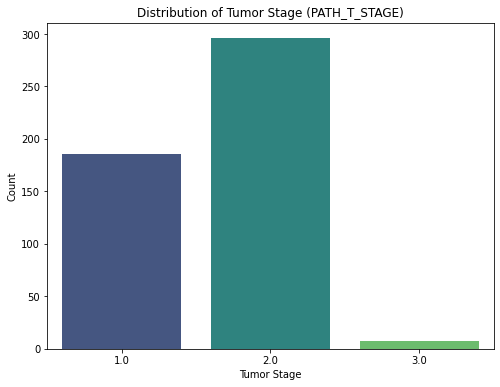

In [50]:
# Bar plot for radiation therapy (categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='RADIATION_THERAPY', data=data_filtered, palette='viridis')
plt.title('Distribution of Radiation Therapy')
plt.xlabel('Radiation Therapy Levels')
plt.ylabel('Count')
plt.show()

# Bar plot for tumor stage (PATH_T_STAGE)
plt.figure(figsize=(8, 6))
sns.countplot(x='PATH_T_STAGE', data=data_filtered, palette='viridis')
plt.title('Distribution of Tumor Stage (PATH_T_STAGE)')
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.show()


## Statistical tests

In [46]:
from scipy.stats import ttest_ind

# Split the data into two groups: no recurrence and recurrence
group1 = data_filtered[data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT'] == 1]['AGE']  # No recurrence
group2 = data_filtered[data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT'].isin([2, 3])]['AGE']  # Recurrence

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Output results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 0.011676826975622653
P-value: 0.9906882335794339


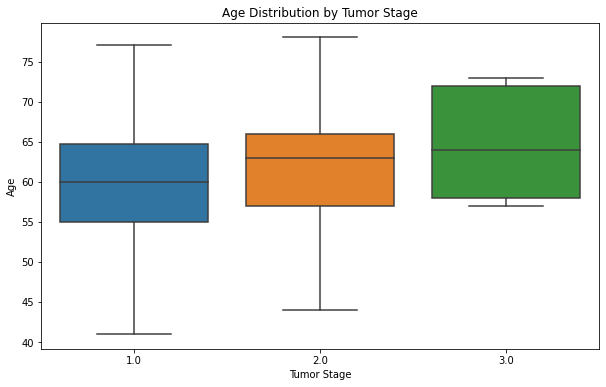

In [47]:
# Boxplot for age by tumor stage (PATH_T_STAGE)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PATH_T_STAGE', y='AGE', data=data_filtered)
plt.title('Age Distribution by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Age')
plt.show()


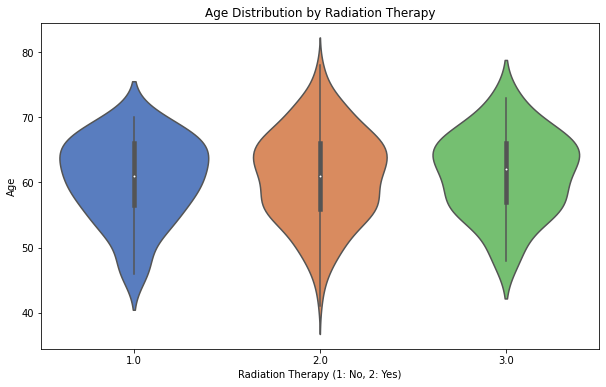

In [48]:
# Violin plot for age by radiation therapy
plt.figure(figsize=(10, 6))
sns.violinplot(x='RADIATION_THERAPY', y='AGE', data=data_filtered, palette='muted')
plt.title('Age Distribution by Radiation Therapy')
plt.xlabel('Radiation Therapy (1: No, 2: Yes)')
plt.ylabel('Age')
plt.show()


## Clustering for Patient Stratification

<ipython-input-85-5de9617e33ff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


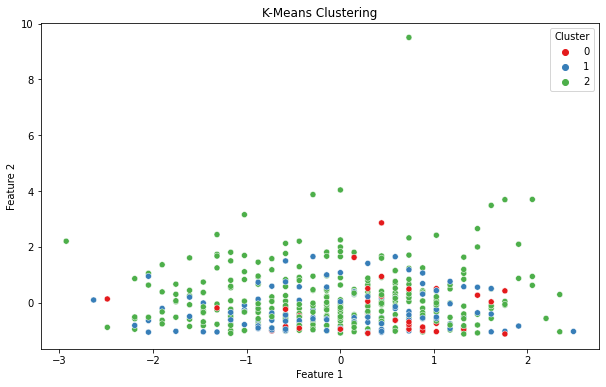

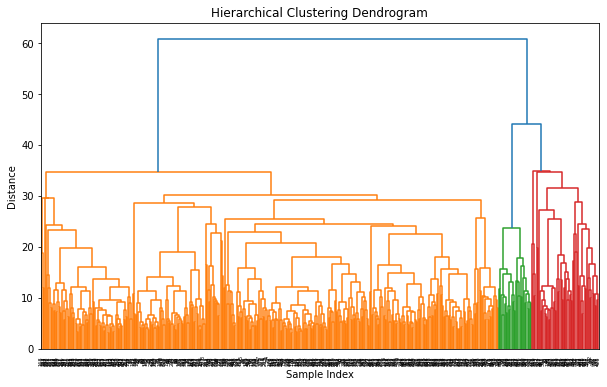

<ipython-input-85-5de9617e33ff>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hierarchical_Cluster'] = hierarchical_clusters


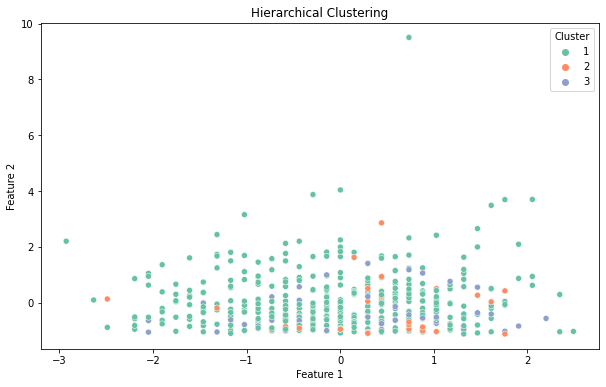

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import seaborn as sns

# First, scale the data for clustering (because K-means is sensitive to feature scales)
scaler = StandardScaler()
X_cluster = data_filtered[selected_features_for_progression]  # Use the selected features

# Scale the features
X_scaled = scaler.fit_transform(X_cluster)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust n_clusters based on domain knowledge or use the elbow method
data_filtered['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data_filtered['KMeans_Cluster'], palette="Set1")
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# 2. Hierarchical Clustering
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Cut the tree at a specific level to form clusters (You can adjust the threshold)
from scipy.cluster.hierarchy import fcluster
hierarchical_clusters = fcluster(sch.linkage(X_scaled, method='ward'), t=3, criterion='maxclust')
data_filtered['Hierarchical_Cluster'] = hierarchical_clusters

# Visualizing hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data_filtered['Hierarchical_Cluster'], palette="Set2")
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()


## Classification of Disease Progression and Therapy Response

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Split the data for classification (using Lasso-selected features)
X = data_filtered[selected_features_for_progression]
y_progression = data_filtered['PATH_N_STAGE']  # Classification target for disease progression

X_train, X_test, y_train, y_test = train_test_split(X, y_progression, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Neural Network (MLPClassifier)
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Evaluating models using ROC-AUC
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')}")
print(f"SVM ROC-AUC: {roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovr')}")
print(f"Neural Network ROC-AUC: {roc_auc_score(y_test, mlp.predict_proba(X_test), multi_class='ovr')}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.32      0.38        22
         2.0       0.70      0.77      0.73        66
         3.0       0.10      0.10      0.10        10

    accuracy                           0.60        98
   macro avg       0.42      0.40      0.40        98
weighted avg       0.59      0.60      0.59        98

SVM Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        22
         2.0       0.67      1.00      0.80        66
         3.0       0.00      0.00      0.00        10

    accuracy                           0.67        98
   macro avg       0.22      0.33      0.27        98
weighted avg       0.45      0.67      0.54        98



C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.27      0.34        22
         2.0       0.71      0.82      0.76        66
         3.0       0.33      0.30      0.32        10

    accuracy                           0.64        98
   macro avg       0.50      0.46      0.47        98
weighted avg       0.62      0.64      0.62        98

Logistic Regression ROC-AUC: 0.6186619484316852
SVM ROC-AUC: 0.5950990164805954
Neural Network ROC-AUC: 0.686217437533227


In [112]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Hyperparameter tuning for Neural Network (MLPClassifier)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}

grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=10000), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)
print("Best parameters for Neural Network:", grid_search_mlp.best_params_)


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}


# RandomForestClassifier for Progression

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data for classification (using Lasso-selected features)
X = data_filtered[selected_features_for_progression]
y_progression = data_filtered['PATH_N_STAGE']  # Classification target for disease progression

X_train, X_test, y_train, y_test = train_test_split(X, y_progression, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

         1.0       1.00      0.05      0.09        22
         2.0       0.69      1.00      0.81        66
         3.0       1.00      0.10      0.18        10

    accuracy                           0.69        98
   macro avg       0.90      0.38      0.36        98
weighted avg       0.79      0.69      0.59        98



In [114]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.88      0.32      0.47        22
         2.0       0.75      0.94      0.83        66
         3.0       0.57      0.40      0.47        10

    accuracy                           0.74        98
   macro avg       0.73      0.55      0.59        98
weighted avg       0.76      0.74      0.71        98



In [115]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])
y_train_adj = y_train - 1
y_test_adj = y_test - 1
pipeline.fit(X_train, y_train_adj)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test_adj, y_pred, zero_division=0, output_dict=True)
print(classification_report(y_test_adj, y_pred, zero_division=0))

C:\Users\Yamlak\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:16:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.60      0.41      0.49        22
         1.0       0.74      0.80      0.77        66
         2.0       0.36      0.40      0.38        10

    accuracy                           0.67        98
   macro avg       0.57      0.54      0.55        98
weighted avg       0.67      0.67      0.67        98



## Classification for Therapy response

In [ ]:

X = data_filtered[selected_features_for_response]
y_response = data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT']  
X_train, X_test, y_train, y_test = train_test_split(X, y_response, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Neural Network (MLPClassifier)
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Evaluating models using ROC-AUC
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')}")
print(f"SVM ROC-AUC: {roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovr')}")
print(f"Neural Network ROC-AUC: {roc_auc_score(y_test, mlp.predict_proba(X_test), multi_class='ovr')}")


In [ ]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))